# ** DIscBIO: a user-friendly pipeline for biomarker discovery in single-cell transcriptomics**

#                      Leiden Notebook 

## Leiden Clustering of CTCs
          
          
          

### Required Packages

In [1]:
library(reticulate)
reticulate::install_miniconda()
reticulate::use_condaenv()
py_install("python-igraph")
py_install("numpy")
py_install("leidenalg", forge = TRUE)
library(DIscBIO)
library(leiden)
library(M3Drop)


* Downloading 'https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh' ...

* Installing Miniconda -- please wait a moment ...

* Miniconda has been successfully installed at '/home/jovyan/.local/share/r-miniconda'.



[1] "/home/jovyan/.local/share/r-miniconda"

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

### Required data


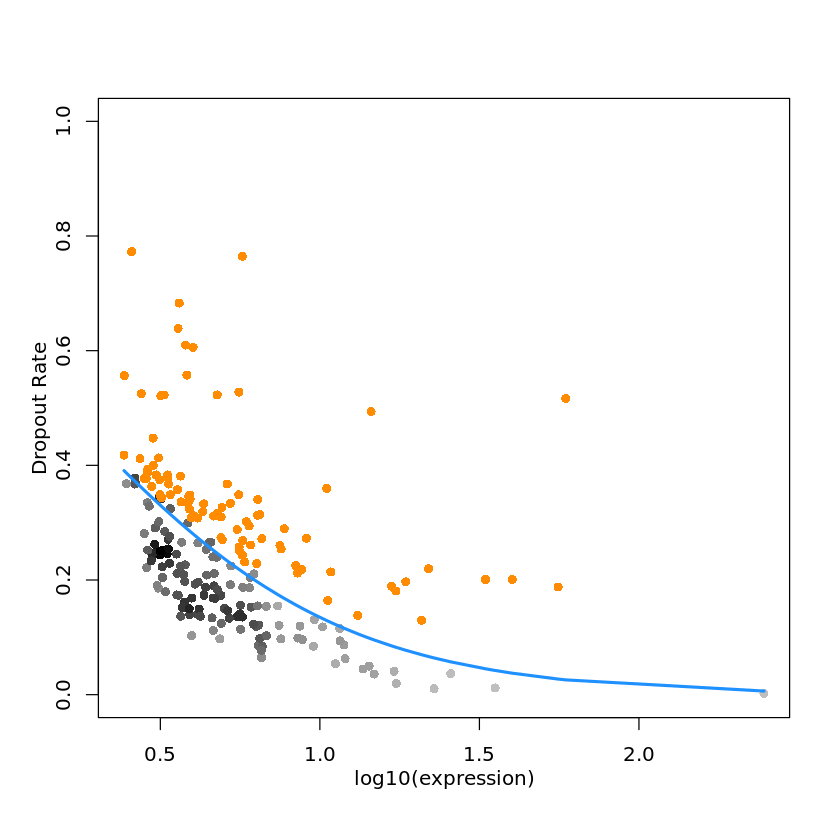

In [2]:
load("SC.RData")           # Loading the "SC" object that has include the data of the k-means clustering 
filteredDataset<-SC@fdata
xprs <- as.matrix(filteredDataset)
xprs[xprs == min(xprs)] <- 0
top.feats <- M3Drop::M3DropFeatureSelection(expr_mat = xprs, mt_method = "fdr",suppress.plot = FALSE, mt_threshold = 0.5) ## Fits a Michaelis-Menten function to the dropout-rate.
top.feats <- head(top.feats$Gene, 500)
top.xprs <- xprs[top.feats, ]
Adj <- stats::cor(top.xprs)
QNT <- quantile(Adj, probs = c(0.5))
bin.Adj <- (Adj > QNT) + 0

### Leiden clustering

The Leiden clustering algorithm has the ability for identifying high-quality partitions and it is partly based on the smart local move algorithm. The Leiden algorithm uses a fast local move procedure. It is considerably more complex than the Louvain algorithm. The resolution parameter controls the coarseness of the clusters and it can fine-tune the number of clusters to be detected.

#### resolution_parameter = 0.5

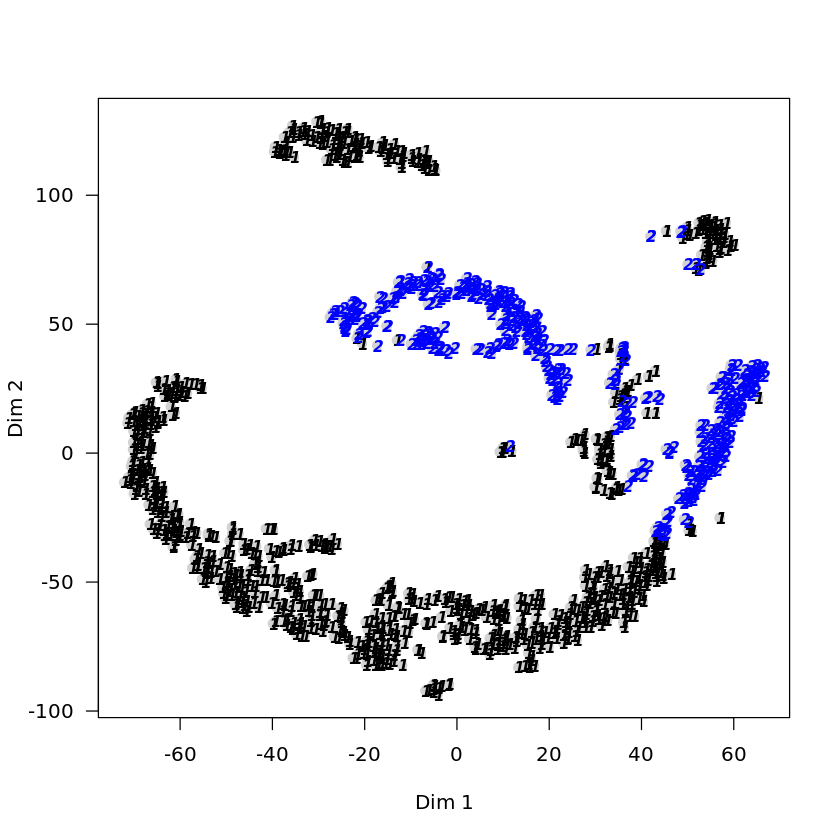

In [3]:
lei.clusts <- leiden(bin.Adj, resolution_parameter = 0.5)   # Leiden algorithm
names(lei.clusts) <- colnames(bin.Adj)

### Visualizing the clusters
SC@kmeans$kpart<-lei.clusts
Factor<-factor(lei.clusts)
K<- length(levels(Factor))
plottSNE(SC)

#### Evaluating the stability and consistancy of the clusters

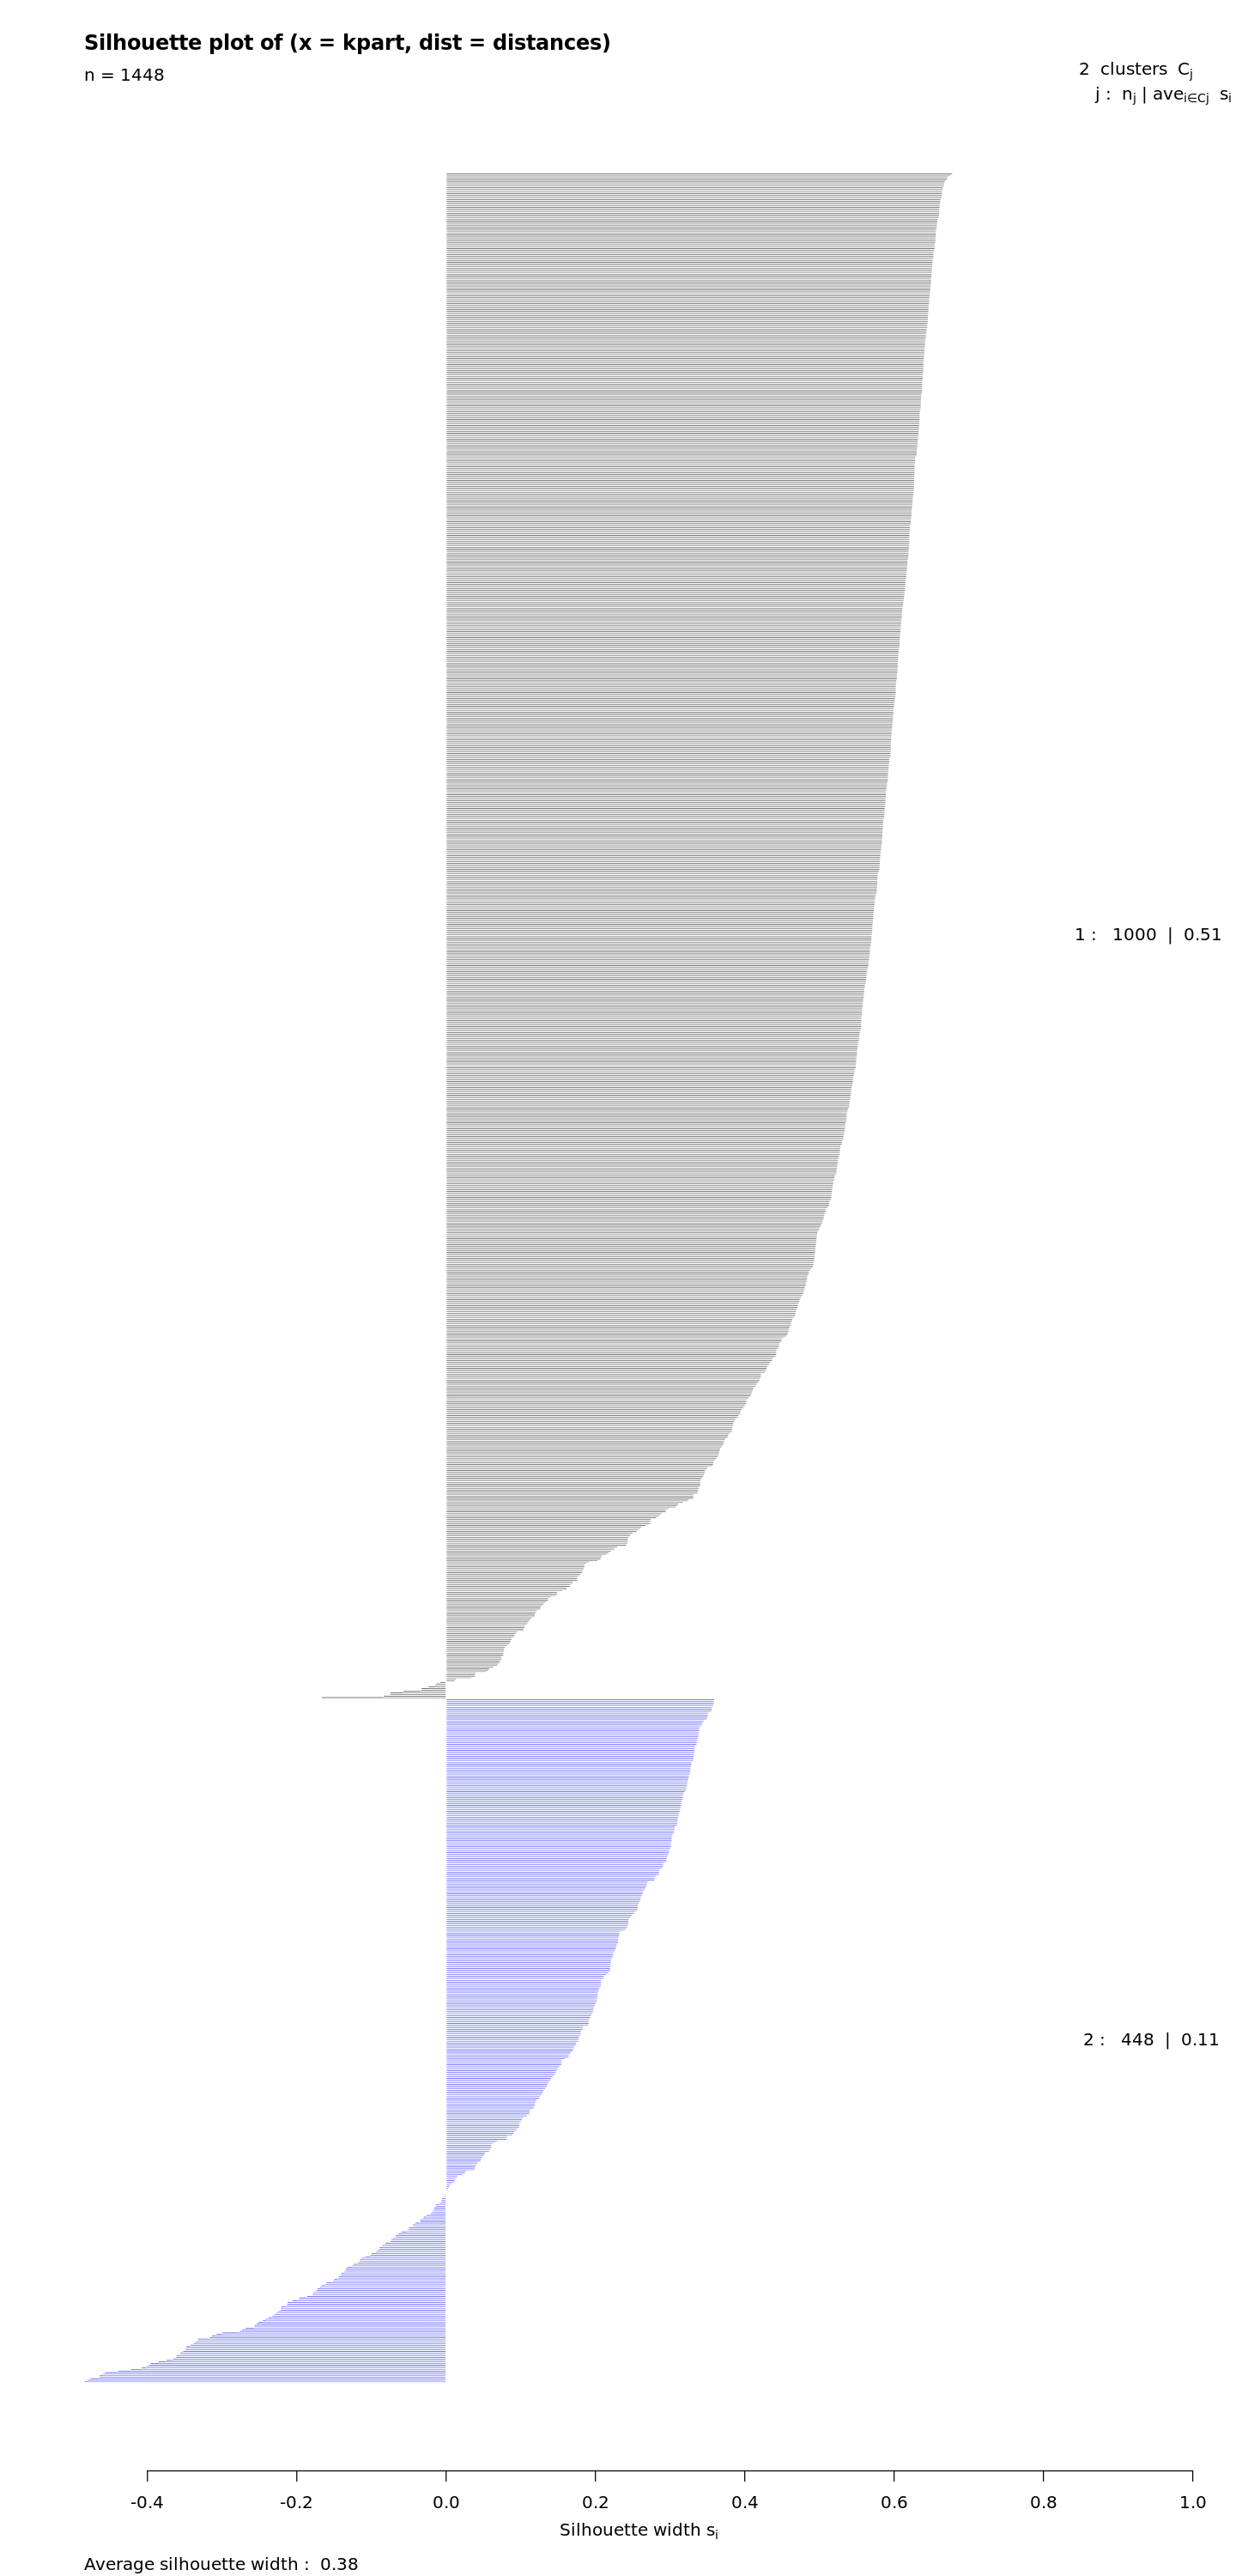

In [4]:
# Silhouette plot
options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(SC,K=K)

[1] 0.563 0.381

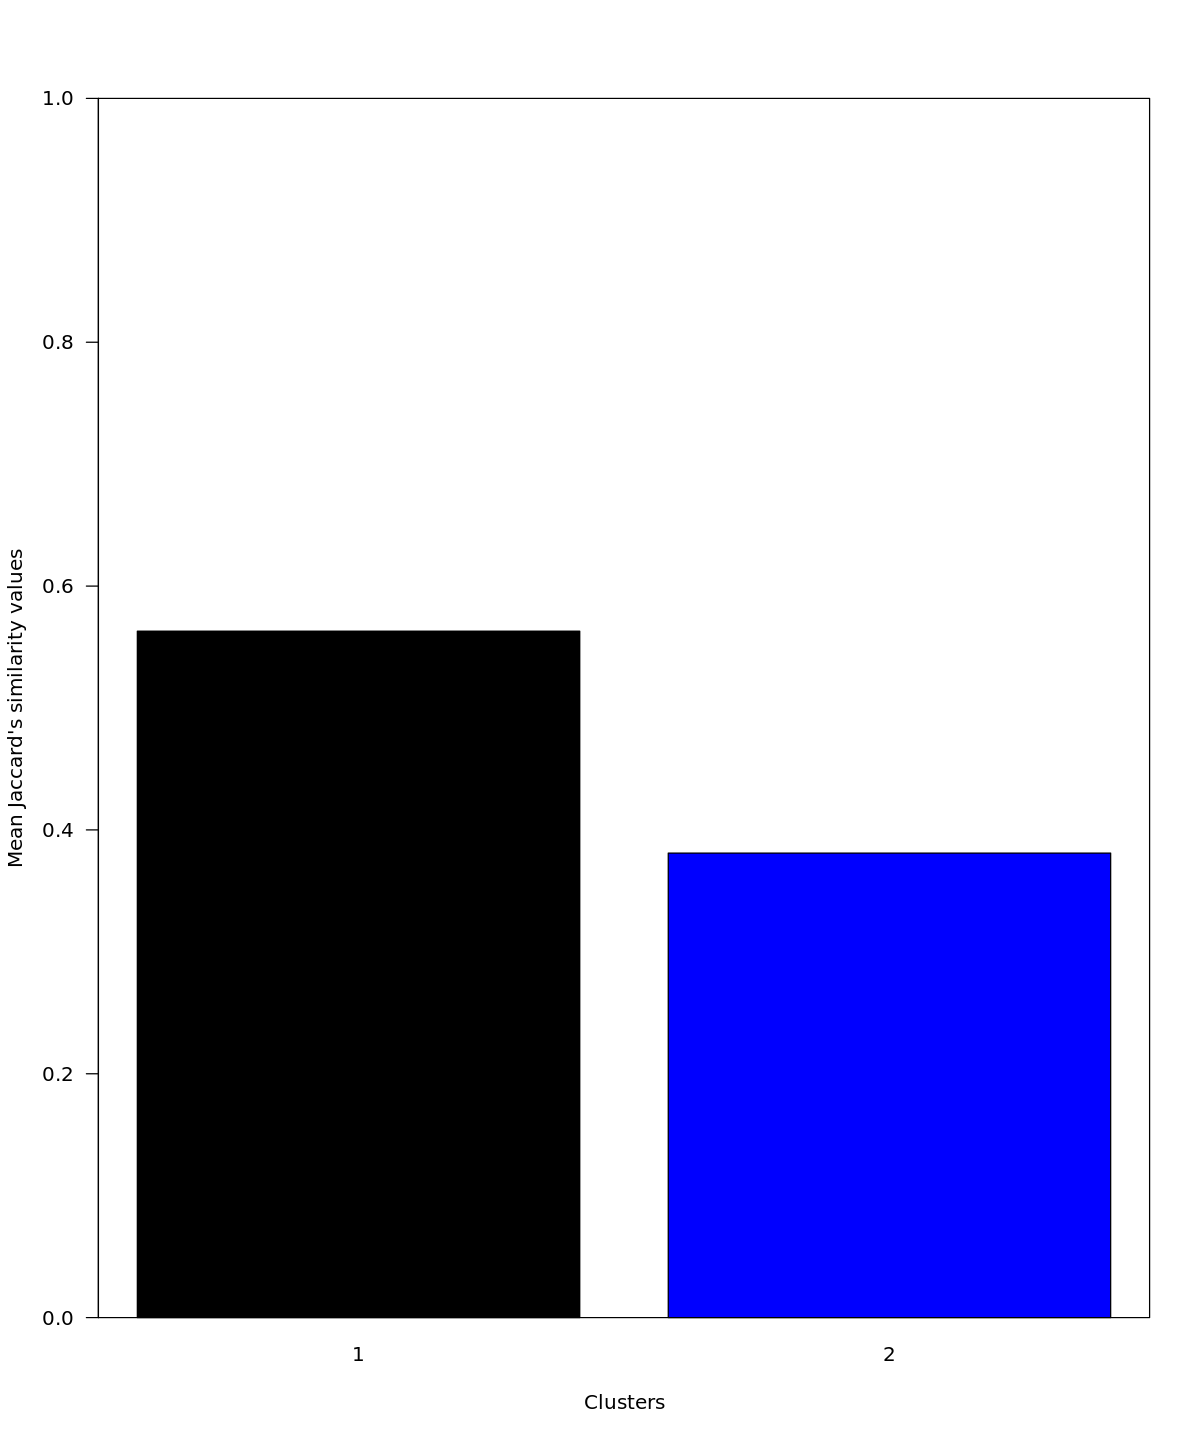

In [5]:
 # Jaccard Similarity
options(repr.plot.width=10, repr.plot.height=12)
Jaccard(SC, K=K, plot = TRUE)   

#### resolution_parameter = 1

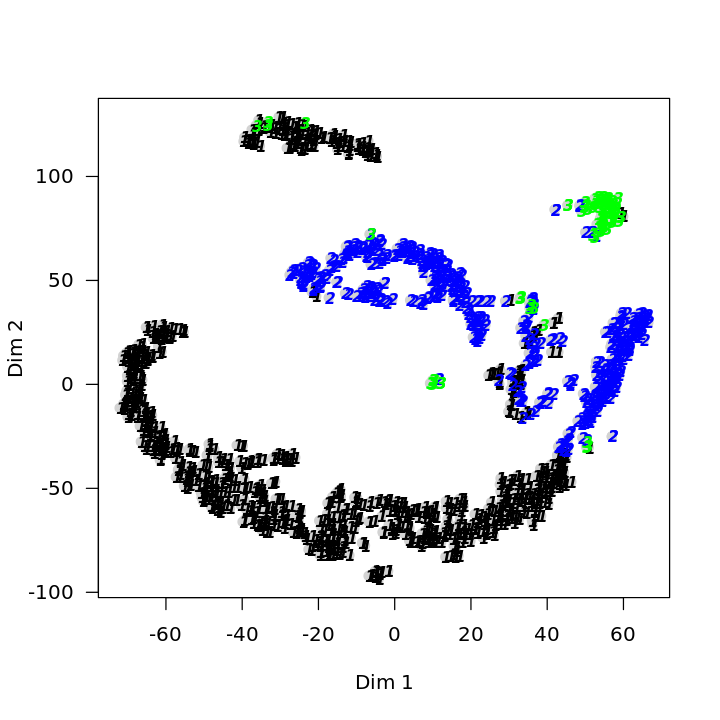

In [6]:
lei.clusts <- leiden(bin.Adj, resolution_parameter = 1)   # Leiden algorithm
names(lei.clusts) <- colnames(bin.Adj)

### Visualizing the clusters
SC@kmeans$kpart<-lei.clusts
Factor<-factor(lei.clusts)
K<- length(levels(Factor))

options(repr.plot.width=6, repr.plot.height=6)
plottSNE(SC)

#### Evaluating the stability and consistancy of the clusters

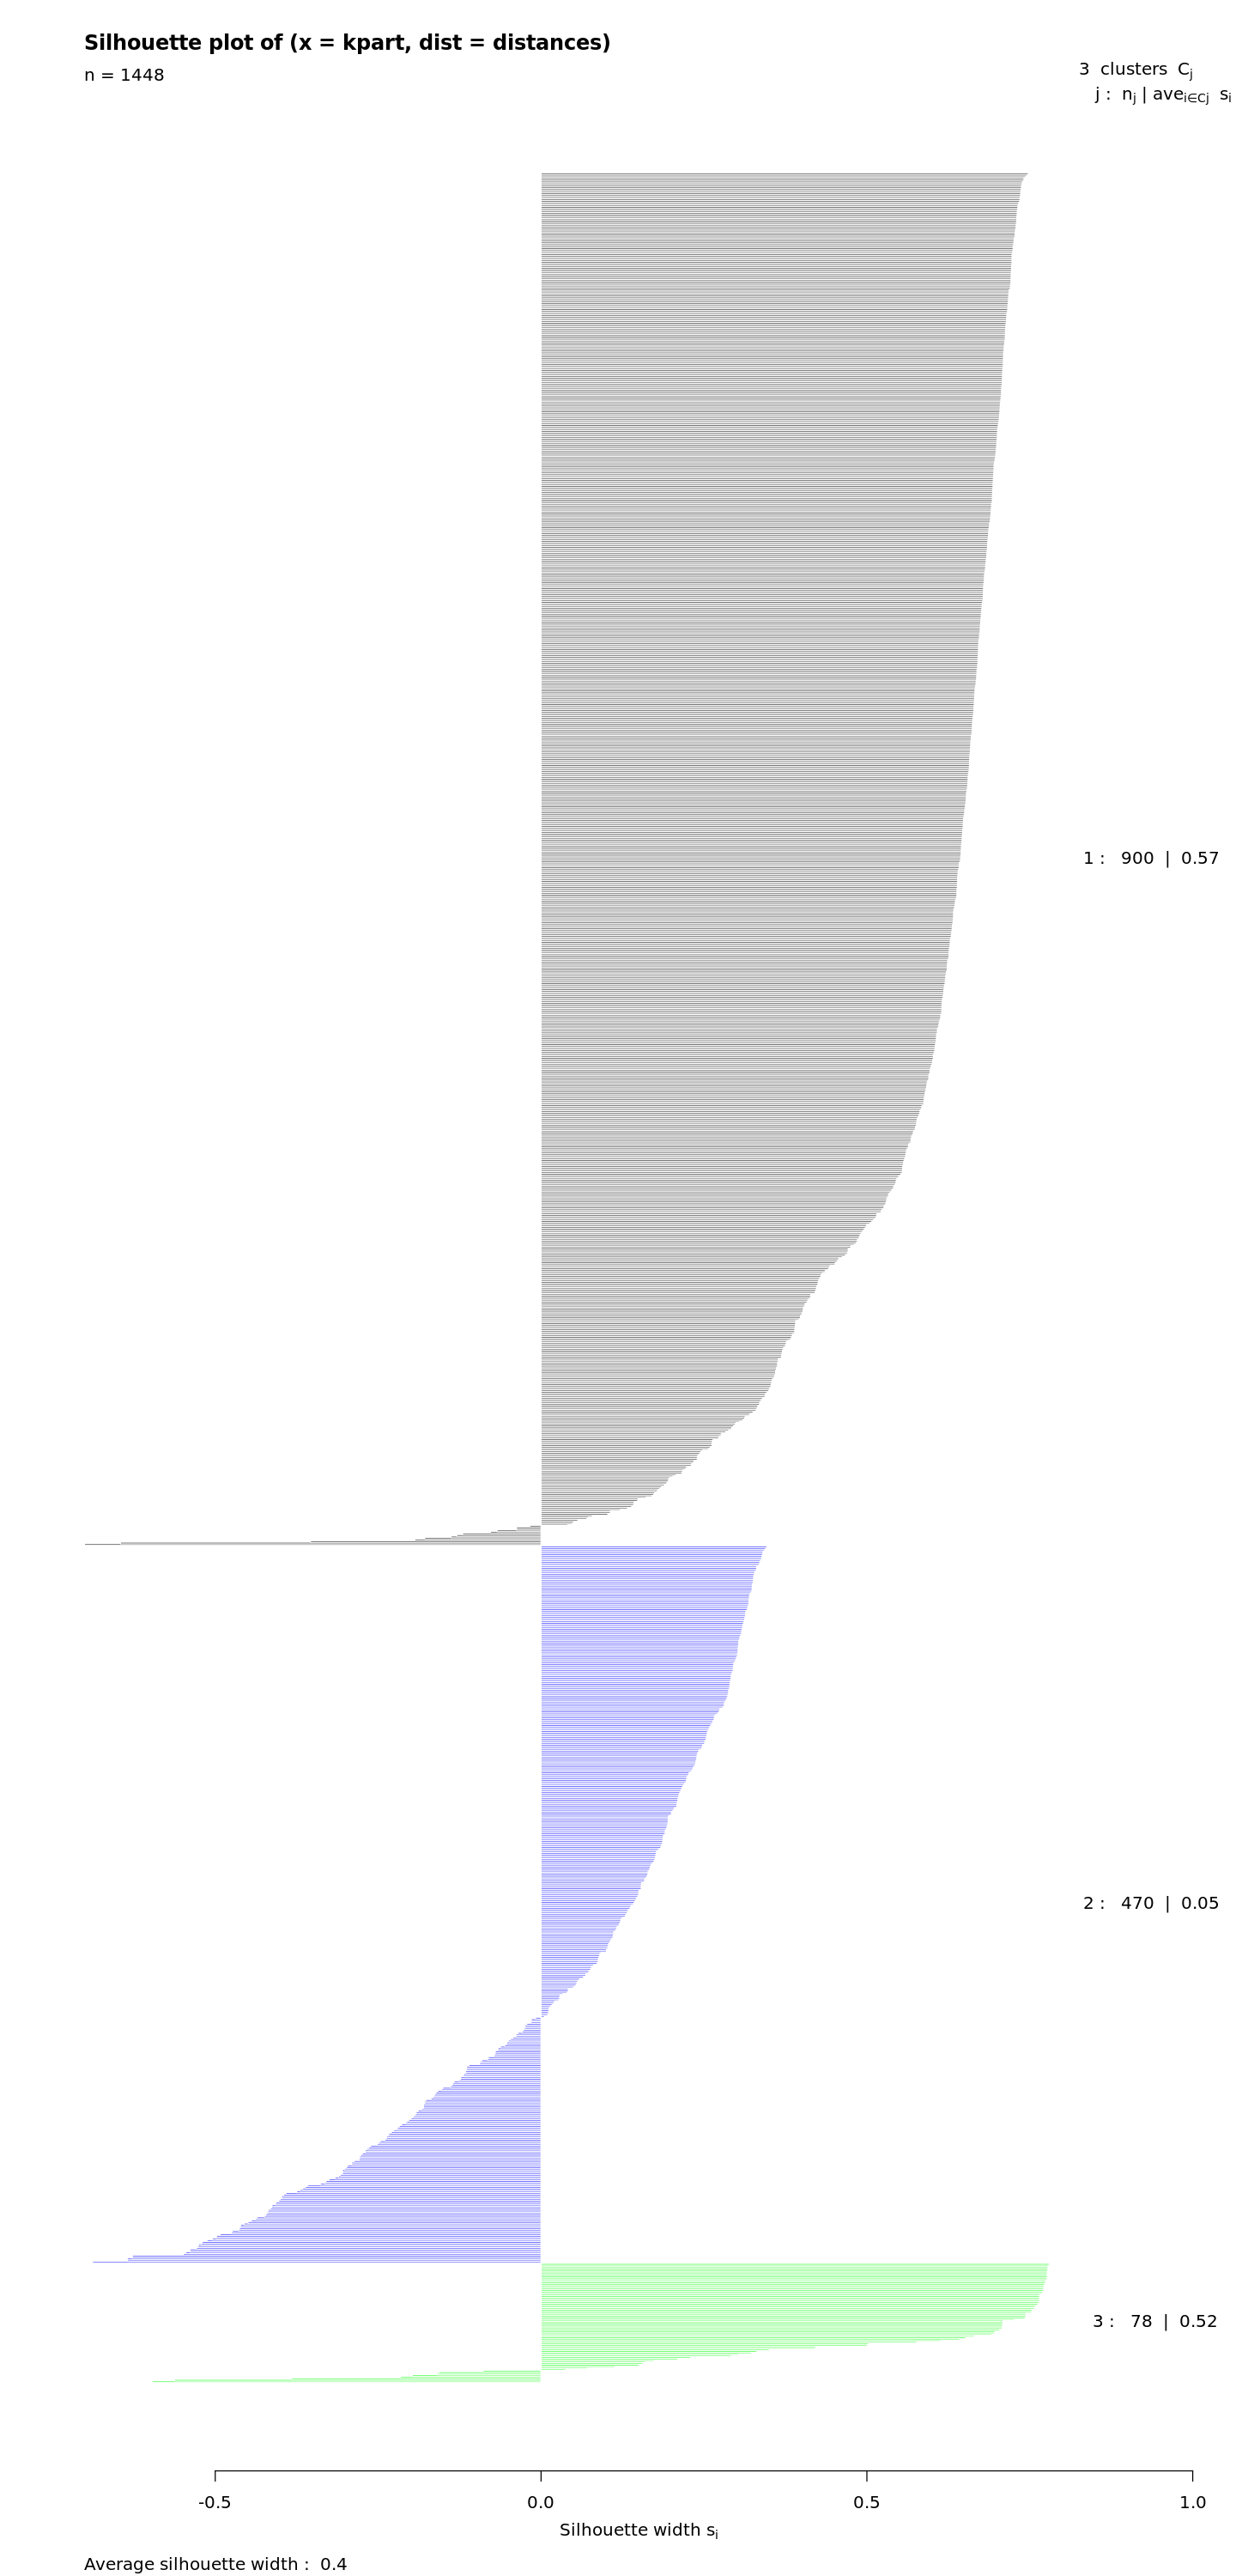

In [7]:
# Silhouette plot
options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(SC,K=K)

[1] 0.628 0.369 0.345

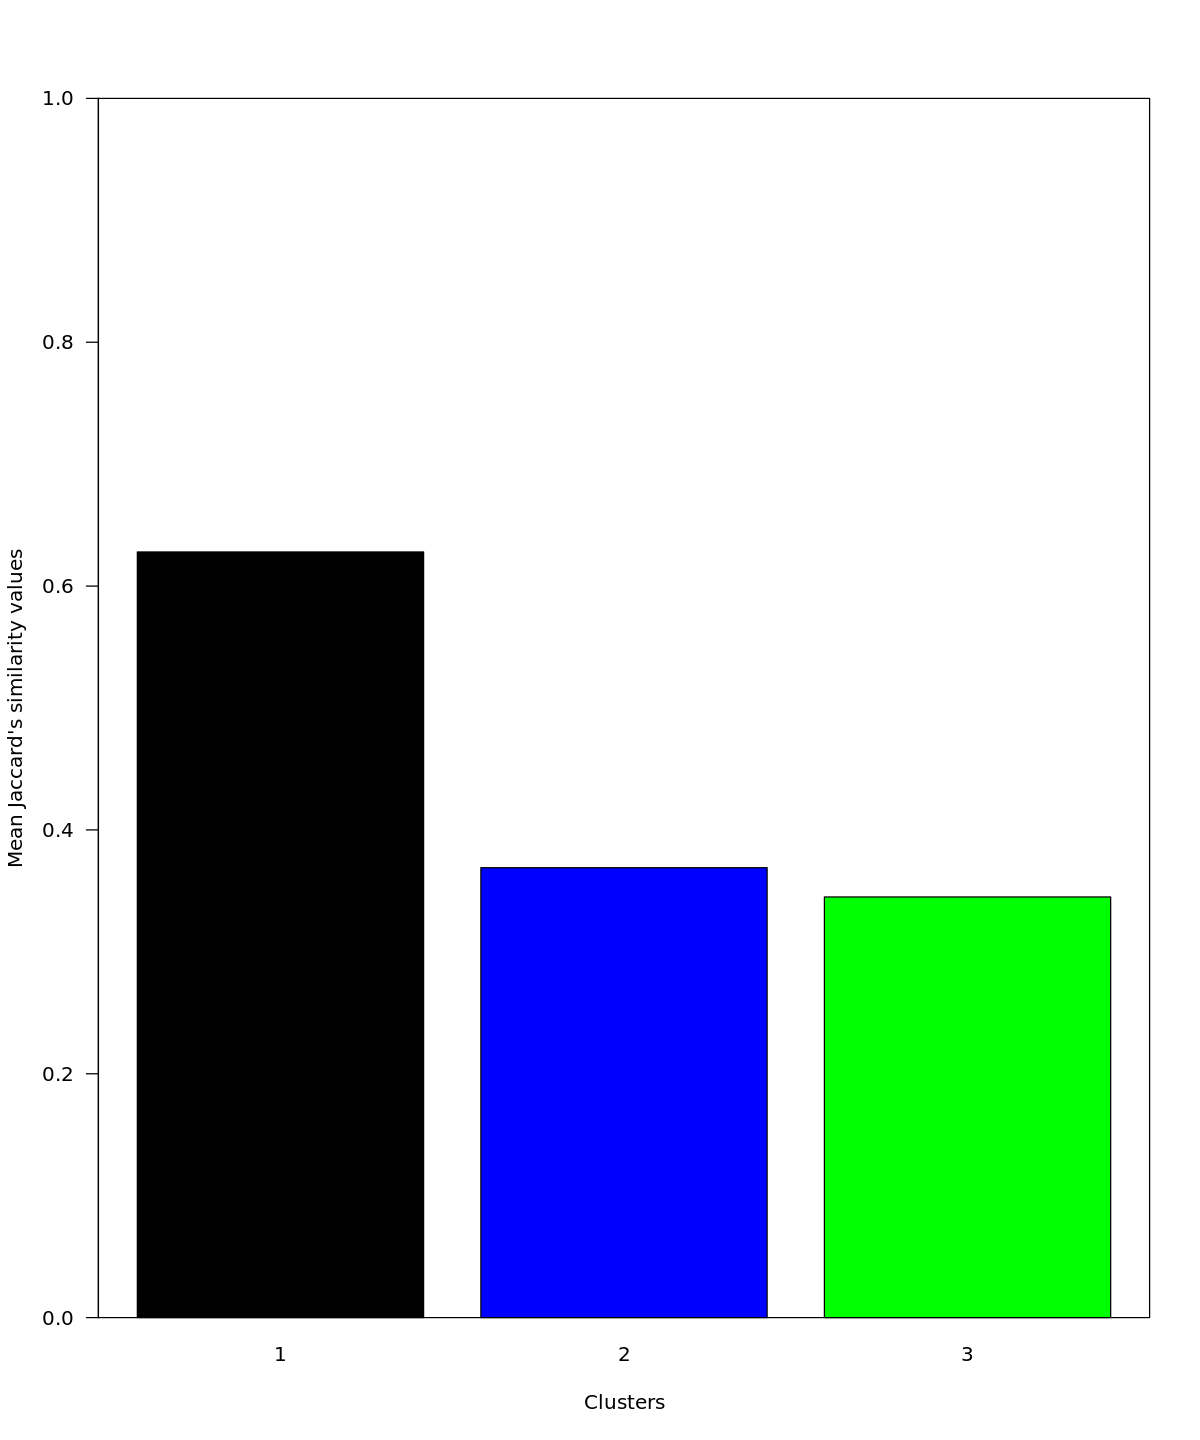

In [8]:
 # Jaccard Similarity
options(repr.plot.width=10, repr.plot.height=12)
Jaccard(SC, K=K, plot = TRUE)   